<a href="https://colab.research.google.com/github/mqquiroz/ICV537/blob/main/Lid_Driven_Cavity_ICV537.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Parametros iniciales
nx = 101
ny = 101
nt = 100000
Re = 100
dt = 0.001

no_it = 100000 # número de iteraciones
Beta  = 1.5 # factor de relajación
err   = 0.001 # parameter for SOR iteration
ds    = 0.01 #dx=dy=ds
#dimensiones de la cavidad
x = np.arange(0,1+ds,ds)
y = np.arange(0,1+ds,ds)
t = 0.0

# inicialización de las variables
phi   = np.zeros((nx,ny))
omega = np.zeros((nx,ny))
u     = np.zeros((nx,ny))
v     = np.zeros((nx,ny))
x2d   = np.zeros((nx,ny))
y2d   = np.zeros((nx,ny))
b     = np.zeros((nx,ny))
p     = np.zeros((nx,ny))
pn    = np.zeros((nx,ny))
w     = np.zeros((nx,ny)) #p-q/(nx-1),

In [5]:
#Cálculo de la función de Corriente
for dt in range(1,nt):
  for iter in range(1,no_it):
    w = phi # by SOR iteration
    for i in range(2,nx-1):
      for j in range(2,ny-1):
        phi[i,j] = 0.25*Beta*(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1]+ds*ds*omega[i,j])+(1.0-Beta)*phi[i,j]
    Err=0.0
    for i in range(1,nx):
      for j in range(1,ny):
        Err = Err + np.abs(w[i,j]-phi[i,j])
    if Err <= err:
      break

In [11]:
#Condiciones de Borde para la Vorticidad
for i in range(2,nx-1):
  for j in range(2,ny-1):
    omega[i,1]  = -2.0*phi[i,2]/(ds*ds) # bottom wall
    #omega[i,ny] = -2.0*phi[i,ny-1]/(ds*ds)-2.0/ds # top wall
    omega[i,ny-1] = -2.0*phi[i,ny-1]/(ds*ds)-2.0/ds # top wall
    omega[1,j]  = -2.0*phi[2,j]/(ds*ds) # right wall
    #omega[nx,j] = -2.0*phi[nx-1,j]/(ds*ds)# left wall
    omega[nx-1,j] = -2.0*phi[nx-1,j]/(ds*ds)# left wall

In [12]:
# RHS Calculation
for i in range(2,nx-1):
  for j in range(2,ny-1):
    w[i,j] = -0.25*((phi[i,j+1]-phi[i,j-1])*(omega[i+1,j]-omega[i-1,j])-(phi[i+1,j]-phi[i-1,j])*(omega[i,j+1]-omega[i,j-1]))/(ds*ds)+(1/Re)*(omega[i+1,j]+omega[i-1,j]+omega[i,j+1]+omega[i,j-1]-4.0*omega[i,j])/(ds*ds)

/tmp/ipython-input-63675096.py:4: RuntimeWarning: overflow encountered in scalar multiply
  w[i,j] = -0.25*((phi[i,j+1]-phi[i,j-1])*(omega[i+1,j]-omega[i-1,j])-(phi[i+1,j]-phi[i-1,j])*(omega[i,j+1]-omega[i,j-1]))/(ds*ds)+(1/Re)*(omega[i+1,j]+omega[i-1,j]+omega[i,j+1]+omega[i,j-1]-4.0*omega[i,j])/(ds*ds)


In [13]:
# Actualizar la Vorticidad
omega[2:nx-1,2:ny-1] = omega[2:nx-1,2:ny-1] + dt*w[2:nx-1,2:ny-1]

t = t + dt # incremento del tiempo

for i in range(1,nx):
  for j in range(1,ny):
    x2d[i,j] = x[i]
    y2d[i,j] = y[j]

/tmp/ipython-input-382881719.py:2: RuntimeWarning: overflow encountered in multiply
  omega[2:nx-1,2:ny-1] = omega[2:nx-1,2:ny-1] + dt*w[2:nx-1,2:ny-1]


In [33]:
X, Y = np.meshgrid(x,y)
print(X)
print(y2d)

[[0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 ...
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]]
[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 ...
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]]


In [14]:
# Cálculos de U y V
for i in range(2,nx-1):
  for j in range(2,ny-1):
    u[i,j]  = (phi[i,j+1]-phi[i,j])/(2*ds)
    v[i,j]  = (phi[i+1,j]-phi[i,j])/(2*ds)
    #u[:,ny] = 1
    u[:,ny-1] = 1
    #v[nx,:] = 0.02
    v[nx-1,:] = 0.02

/tmp/ipython-input-1011551702.py:5: RuntimeWarning: invalid value encountered in scalar subtract
  v[i,j]  = (phi[i+1,j]-phi[i,j])/(2*ds)


In [15]:
# Cálculos de presión
rhs = np.zeros((nx,ny))
for i in range(2,nx-1):
  for j in range(2,ny-1):
    rhs[i,j] = (((phi[i-1,j]-2*phi[i,j]+phi[i+1,j])/(ds*ds))*((phi[i,j-1]-2*phi[i,j]+phi[i,j+1])/(ds*ds)))-(phi[i+1,j+1]-phi[i+1,j-1]-phi[i-1,j+1]+phi[i-1,j-1])/(4*(ds*ds))

    p[i,j]=(0.25*(pn[i+1,j]+pn[i-1,j] + pn[i,j+1]+pn[i,j-1])- 0.5*((rhs[i,j]*ds**2*ds**2)))

  pn = p

/tmp/ipython-input-3365593772.py:5: RuntimeWarning: overflow encountered in scalar multiply
  rhs[i,j] = (((phi[i-1,j]-2*phi[i,j]+phi[i+1,j])/(ds*ds))*((phi[i,j-1]-2*phi[i,j]+phi[i,j+1])/(ds*ds)))-(phi[i+1,j+1]-phi[i+1,j-1]-phi[i-1,j+1]+phi[i-1,j-1])/(4*(ds*ds))
/tmp/ipython-input-3365593772.py:5: RuntimeWarning: overflow encountered in scalar divide
  rhs[i,j] = (((phi[i-1,j]-2*phi[i,j]+phi[i+1,j])/(ds*ds))*((phi[i,j-1]-2*phi[i,j]+phi[i,j+1])/(ds*ds)))-(phi[i+1,j+1]-phi[i+1,j-1]-phi[i-1,j+1]+phi[i-1,j-1])/(4*(ds*ds))
/tmp/ipython-input-3365593772.py:7: RuntimeWarning: invalid value encountered in scalar add
  p[i,j]=(0.25*(pn[i+1,j]+pn[i-1,j] + pn[i,j+1]+pn[i,j-1])- 0.5*((rhs[i,j]*ds**2*ds**2)))
/tmp/ipython-input-3365593772.py:5: RuntimeWarning: invalid value encountered in scalar multiply
  rhs[i,j] = (((phi[i-1,j]-2*phi[i,j]+phi[i+1,j])/(ds*ds))*((phi[i,j-1]-2*phi[i,j]+phi[i,j+1])/(ds*ds)))-(phi[i+1,j+1]-phi[i+1,j-1]-phi[i-1,j+1]+phi[i-1,j-1])/(4*(ds*ds))
/tmp/ipython-input-3365593

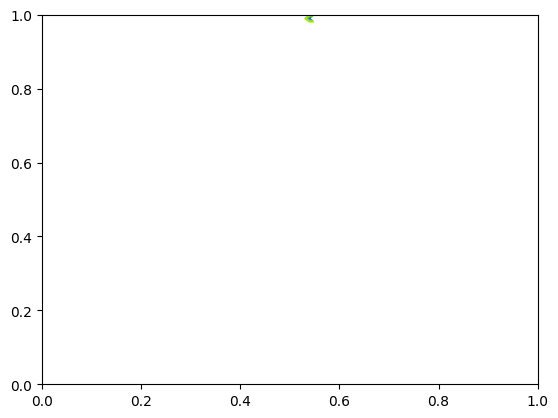

In [25]:
plt.contour(x2d,y2d,omega)#,[10**-10,10**-7,10**-5,10**-4,0.0100, 0.0300, 0.0500, 0.0700, 0.0900, 0.100, 0.1100, 0.1150, 0.1175])
plt.show()